In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
from datetime import datetime 

import warnings
warnings.filterwarnings('ignore')

## 1. Tiền xử lý dữ liệu

In [277]:
train_df = pd.read_csv('clean_data.csv')
train_df_temp = train_df.copy()
train_df_temp.head()

,Id,Title,Price(Triệu/tháng),Square(m²),District,City,Date
0,478324,Cho thuê phòng để ở tại 108/64A1 Trần Quang Di...,3.5,18.0,Quận 3,Hồ Chí Minh,20/06/2020
1,728993,Phòng vừa xây xong thoáng mát gần các trường Đ...,3.3,25.0,Quận 7,Hồ Chí Minh,17/10/2018
2,781296,Cần share lại gấp phòng trọ mới thuê tại đường...,3.0,15.0,Quận 10,Hồ Chí Minh,05/10/2018
3,781448,Chính chủ cho thuê căn hộ dịch vụ gần sân bay ...,7.0,27.0,Tân Bình,Hồ Chí Minh,06/10/2018
4,789361,"Phòng cho thuê giá rẻ, Quận Gò Vấp gần chung c...",1.7,12.0,Gò Vấp,Hồ Chí Minh,09/10/2018


### Bỏ đi những cột không cần thiết

In [278]:
train_df_temp.drop('City', axis= 1, inplace = True)
train_df_temp.drop('Date', axis= 1, inplace = True)

### Tạo thêm đặc trưng cho bảng dữ liệu 
> Dựa vào đặc trưng: 'Title' để tạo thêm 6 đặc trưng: isNew(phòng mới hay cũ) , hasFurniture (có nội thất không), liveTogether(ở ghép/ktx), isWholeHouse (có phải nhà nguyên căn không), isApartment (có phải căn hộ không), isNearCenter (có gần trung tâm không)

In [279]:
def isWholeHouse(df):
    df["Title"] = df["Title"].str.lower()
    e = ['nguyên']
    df['isWholeHouse'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [280]:
def isLiveTogether(df):
    df["Title"] = df["Title"].str.lower()
    e = ['ghép','share',"ktx",'túc']
    df['isLiveTogether'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [281]:
def isApartment(df):
    df["Title"] = df["Title"].str.lower()
    e = ['hộ','cư', 'chdv']
    df['isApartment'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [282]:
def isNew(df):
    df["Title"] = df["Title"].str.lower()
    e = ['mới', 'vừa', 'xây']
    df['isNew'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [283]:
def isNearCenter(df):
    df["Title"] = df["Title"].str.lower()
    e = ['tâm', 'tam']
    df['isNearCenter'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [284]:
def hasFurniture(df):
    df["Title"] = df["Title"].str.lower()
    e = ['nội thất', 'noi that', 'tiện nghi','tiện ích','cao cấp','cao cap','hiện đại','hien dai']
    df['hasFurniture'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [285]:
train_df_temp = isNew(train_df_temp)
train_df_temp = isNearCenter(train_df_temp)
train_df_temp = hasFurniture(train_df_temp)
train_df_temp = isWholeHouse(train_df_temp)
train_df_temp = isLiveTogether(train_df_temp)
train_df_temp = isApartment(train_df_temp)

In [286]:
train_df_temp.head()

,Id,Title,Price(Triệu/tháng),Square(m²),District,isNew,isNearCenter,hasFurniture,isWholeHouse,isLiveTogether,isApartment
0,478324,cho thuê phòng để ở tại 108/64a1 trần quang di...,3.5,18.0,Quận 3,no,no,no,no,no,no
1,728993,phòng vừa xây xong thoáng mát gần các trường đ...,3.3,25.0,Quận 7,yes,no,no,no,no,no
2,781296,cần share lại gấp phòng trọ mới thuê tại đường...,3.0,15.0,Quận 10,yes,no,no,no,yes,no
3,781448,chính chủ cho thuê căn hộ dịch vụ gần sân bay ...,7.0,27.0,Tân Bình,no,no,no,no,no,yes
4,789361,"phòng cho thuê giá rẻ, quận gò vấp gần chung c...",1.7,12.0,Gò Vấp,no,no,no,no,no,yes


In [287]:
train_df_temp.shape

(1139, 11)

### Xác định biến Categorical/Numeric

In [288]:
train_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1139 non-null   int64  
 1   Title               1139 non-null   object 
 2   Price(Triệu/tháng)  1139 non-null   float64
 3   Square(m²)          1139 non-null   float64
 4   District            1139 non-null   object 
 5   isNew               1139 non-null   object 
 6   isNearCenter        1139 non-null   object 
 7   hasFurniture        1139 non-null   object 
 8   isWholeHouse        1139 non-null   object 
 9   isLiveTogether      1139 non-null   object 
 10  isApartment         1139 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 98.0+ KB


In [289]:
# Biến Categorical
cat_vars = ['District', 'isNew', 'hasFurniture', 'isLiveTogether','isNearCenter','isWholeHouse','isApartment']
# Biến numerical
num_vars = ['Price(Triệu/tháng)', 'Square(m²)']

Với biến numerical, nhóm dùng distplot để vẽ biểu đồ phân bố của 2 đặc trưng: Price và Square để quan sát

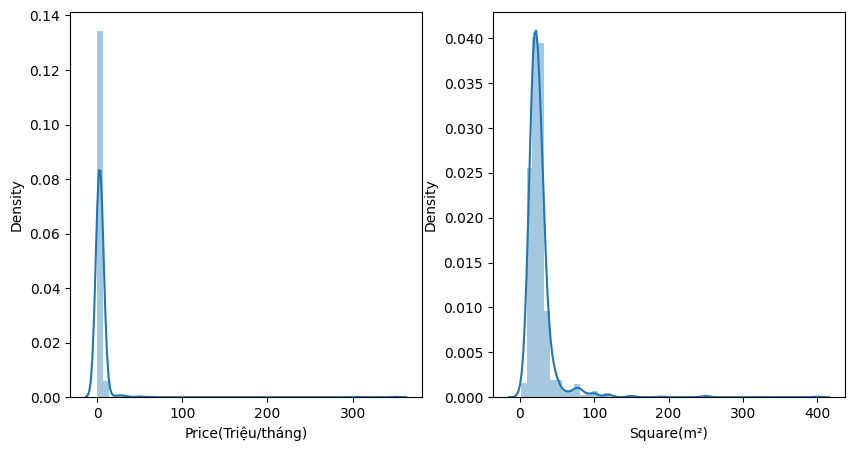

In [290]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
sns.distplot(train_df_temp[num_vars[0]])
plt.subplot(122)
sns.distplot(train_df_temp[num_vars[1]])
plt.show()

Ta thấy ở thuộc tính giá dữ liệu tập trung dưới 10 triệu và ở diện tích dữ liệu tập trung dưới 100 triệu nên ta sẽ loại những dòng trên 10 triệu (giá) và 100 m^2 (Diện tích)

In [291]:
train_df_temp.drop(train_df_temp[train_df_temp['Price(Triệu/tháng)'] > 10].index, inplace = True)
train_df_temp.drop(train_df_temp[train_df_temp['Square(m²)'] > 100].index, inplace = True)


In [292]:
train_df_temp.describe()

,Id,Price(Triệu/tháng),Square(m²)
count,1.107000e+03,1107.000000,1107.000000
mean,1.509529e+06,3.220874,24.296793
std,3.360572e+05,1.673107,11.172273
min,4.783240e+05,0.000000,1.000000
25%,1.443659e+06,2.000000,18.000000
50%,1.561907e+06,3.000000,22.000000
75%,1.740762e+06,4.000000,30.000000
max,2.127970e+06,10.000000,100.000000


### Loại bỏ outliers

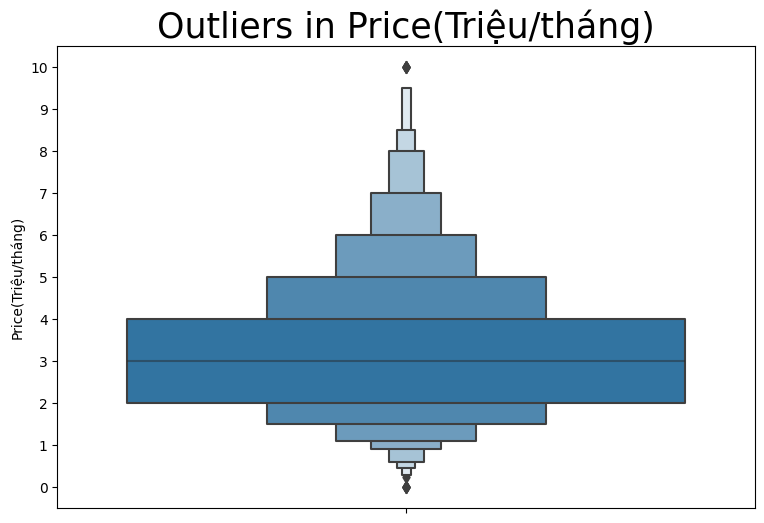

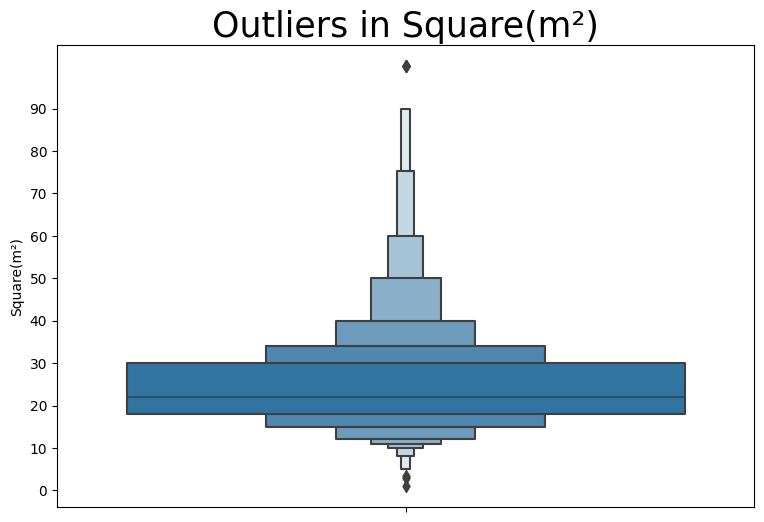

In [293]:
for col in num_vars:
    plt.figure(figsize=(9,6))
    sns.boxenplot(y=col,data=train_df_temp)
    plt.title('Outliers in {}'.format(col),fontsize=25,fontweight=5)
    if col == 'Price(Triệu/tháng)':
        plt.yticks(range(0,11,1))
    if col == 'Square(m²)':
        plt.yticks(range(0,100,10))
    plt.show()

Outliers ở giá nằm ở mức gần 10 triệu, ở diện tích nằm ở mức gần 100 và nằm dưới 5, ta sẽ loại những giá trị này để tránh ảnh hưởng

In [294]:
train_df_temp.drop(train_df_temp[train_df_temp['Price(Triệu/tháng)'] > 9.7].index, inplace = True)
train_df_temp.drop(train_df_temp[train_df_temp['Square(m²)'] > 95].index, inplace = True)
train_df_temp.drop(train_df_temp[train_df_temp['Square(m²)'] < 5].index, inplace = True)

## 2. Chọn các feature để build model

### Ta sẽ Label Encoding các biến category

In [295]:
from sklearn.preprocessing import LabelEncoder

In [296]:
encoder = LabelEncoder()
df_new = train_df_temp.drop(columns=['Id', 'Title', 'Price(Triệu/tháng)', 'Square(m²)'])
for i in cat_vars:
    df_new[i] = encoder.fit_transform(df_new[i])
df_new['Price'] = train_df_temp['Price(Triệu/tháng)']
df_new['Square'] = train_df_temp['Square(m²)']

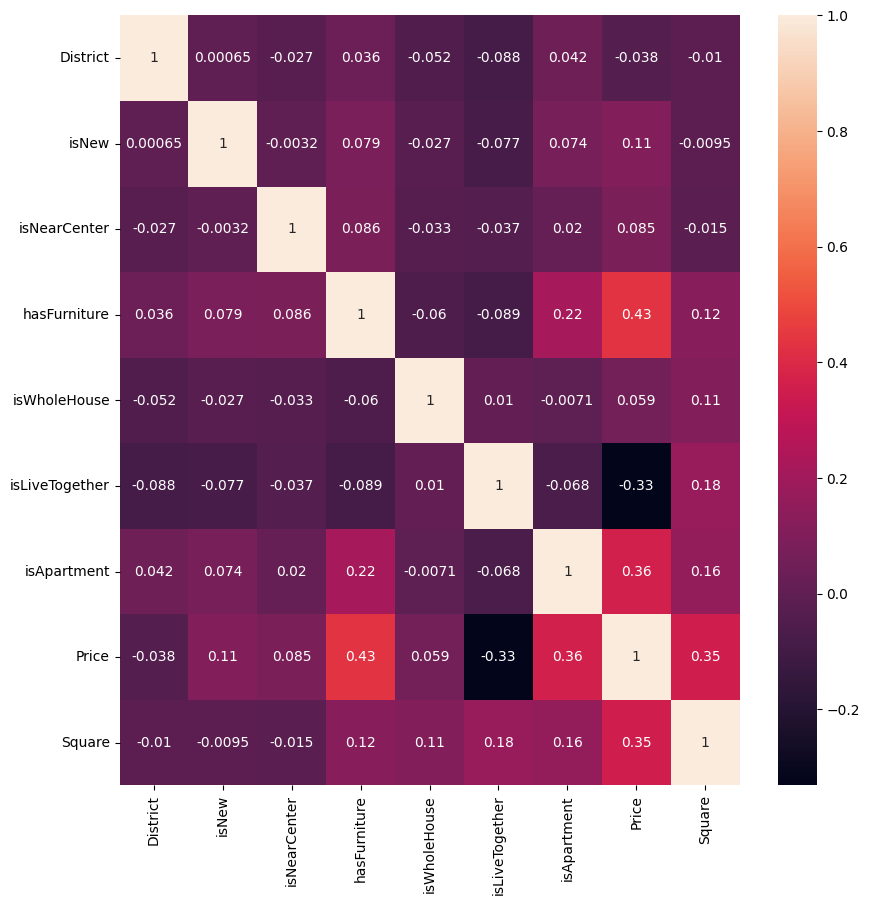

In [297]:
fig= plt.subplots(figsize = (10,10))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

Ta thấy những cột ít có sự ảnh hưởng đến giá nhất là isWholeHouse, isNew, isNearCenter, District, ta sẽ bỏ những thuộc tính này đi

In [298]:
df_new.drop(columns=['District','isWholeHouse', 'isNew', 'isNearCenter','isNew'],inplace=True)

## 3 Xây dựng model

In [299]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import time

Ta sẽ chọn các thuật toán là LinearRegression, Ridge, Lasso, KNeighborsRegressor, RandomForestRegressor

### Chia các tập train, validation, test

In [300]:
X = df_new.drop(columns=['Price'])
y = df_new['Price']

Ta sẽ dùng phương pháp K Fold Cross Validation để chọn mô hình tốt nhất

In [301]:
from sklearn.model_selection import cross_val_score

In [302]:
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5)
scores.mean()

0.3945766068760019

In [303]:
model = Ridge()
scores = cross_val_score(model, X, y, cv=5)
scores.mean()

0.394810582988136

In [304]:
model = Lasso()
scores = cross_val_score(model, X, y, cv=5)
scores.mean()

0.05116601627152444

In [305]:
model = KNeighborsRegressor()
scores = cross_val_score(model, X, y, cv=5)
scores.mean()

0.20646452582659608

In [306]:
model = RandomForestRegressor()
scores = cross_val_score(model, X, y, cv=5)
scores.mean()

0.3826494191940689

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)


Ta sẽ chọn ra 3 mô hình có điểm cao nhất là LinearRegression, Ridge,RandomForestRegressor

======TRAIN======
Train error (MAE): 0.91412
R2 score : 0.4419
======TEST======
Test error (MAE): 0.88389
R2 score : 0.46075


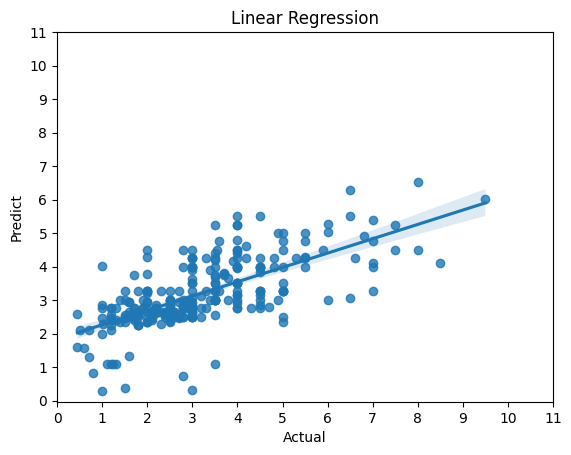

In [308]:
model = LinearRegression()
model.fit(X_train,y_train)

print("======TRAIN======")
y_pre_train = model.predict(X_train)
score_train = mean_absolute_error(y_train,y_pre_train).round(5)
score_r2 = r2_score(y_train,y_pre_train).round(5)
print("Train error (MAE): {}".format(score_train))
print("R2 score : {}".format(score_r2))
print("======TEST======")
y_pre_test = model.predict(X_test)
score_test = mean_absolute_error(y_test,y_pre_test).round(5)
score_r2 = r2_score(y_test,y_pre_test).round(5)
print("Test error (MAE): {}".format(score_test))
print("R2 score : {}".format(score_r2))
sns.regplot(x = y_test, y = y_pre_test)
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.xticks(range(0,12,1))
plt.yticks(range(0,12,1))
plt.show()

======TRAIN======
Train error (MAE): 0.9137
R2 score : 0.44186
======TEST======
Test error (MAE): 0.88354
R2 score : 0.46097


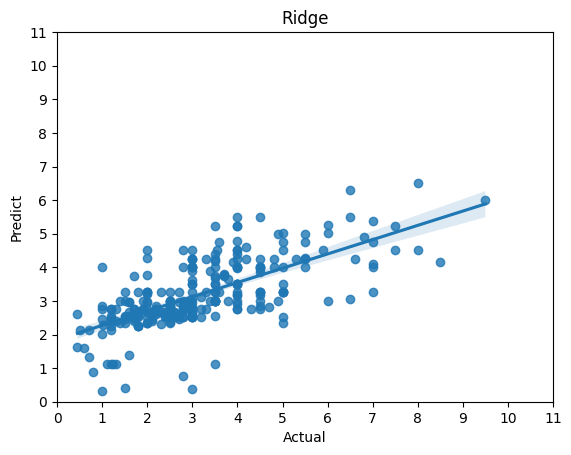

In [309]:
model = Ridge()
model.fit(X_train,y_train)

print("======TRAIN======")
y_pre_train = model.predict(X_train)
score_train = mean_absolute_error(y_train,y_pre_train).round(5)
score_r2 = r2_score(y_train,y_pre_train).round(5)
print("Train error (MAE): {}".format(score_train))
print("R2 score : {}".format(score_r2))
print("======TEST======")
y_pre_test = model.predict(X_test)
score_test = mean_absolute_error(y_test,y_pre_test).round(5)
score_r2 = r2_score(y_test,y_pre_test).round(5)
print("Test error (MAE): {}".format(score_test))
print("R2 score : {}".format(score_r2))
sns.regplot(x = y_test, y = y_pre_test)
plt.title('Ridge')
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.xticks(range(0,12,1))
plt.yticks(range(0,12,1))
plt.show()

======TRAIN======
Train error (MAE): 0.7802
R2 score : 0.58949
======TEST======
Test error (MAE): 0.91254
R2 score : 0.38116


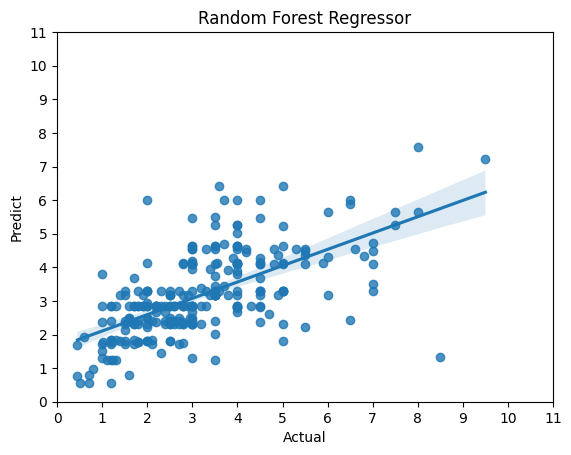

In [310]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

print("======TRAIN======")
y_pre_train = model.predict(X_train)
score_train = mean_absolute_error(y_train,y_pre_train).round(5)
score_r2 = r2_score(y_train,y_pre_train).round(5)
print("Train error (MAE): {}".format(score_train))
print("R2 score : {}".format(score_r2))
print("======TEST======")
y_pre_test = model.predict(X_test)
score_test = mean_absolute_error(y_test,y_pre_test).round(5)
score_r2 = r2_score(y_test,y_pre_test).round(5)
print("Test error (MAE): {}".format(score_test))
print("R2 score : {}".format(score_r2))
sns.regplot(x = y_test, y = y_pre_test)
plt.title('Random Forest Regressor')
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.xticks(range(0,12,1))
plt.yticks(range(0,12,1))
plt.show()

Ta thấy tuy train Linear và Ridge có R2_score thấp cùng độ lỗi cao nhưng khi cho chạy tập test thì lại có kết quả tốt hơn cả train. RandomForestRegressor thì ngược lại, train đưa ra kết quả rất tốt nhưng thực tế lại đưa ra kết quả thấp hơn 2 mô hình kia ( (hiện tượng overfit)